# COMP4115: Exploratory Data Analysis and Visualization
# Lab 4: Basic Data Visualization

## 1. matplotlib 
Matplotlib is the standard plotting library in Python. It is well tested, well maintained and it has been around since ~2003. It also has a great support community.

Matplotlib is highly customizable and sometimes it takes a lot of code to make a plot look like you want. It would take over a full week to go through all of the commands and aspects in matplotlib, therefore this notebook only works as a gentle introduciton.

Many other plotting libraries (like `seaborn, pandas, bokeh, plotly, ` etc.) are built on top / integrates well with matplotlib. Therefore, it is an important package to know.

### Official gallery of matplotlib plot examples
<div class='alert alert-info'>Please visit the <a href='https://matplotlib.org/gallery.html'>`matplotlib gallery`</a> and look at all the different plots you can make</div>

### 1.1 Load matplotlib

In [31]:
# Standard way to import matplotlib from scratch: import matplotlib.pyplot as plt
# you might also see import pylab, however the procedure below is preferred

import matplotlib.pyplot as plt # always import pyplot module as plt (standard)
import numpy as np

# set seed
np.random.seed(0)

# add IPython magic command %matplotlib inline 
# to print pyplot output inline in the notebook withput calling plt.show()
%matplotlib inline

# Increase standard plot size
plt.rcParams['figure.figsize'] = (7, 4.5)

### 1.2 Two plotting approaches

There are two approaches to plotting the:
1. The functional approach
2. Object-oriented approach **(preferred)**

#### Functional plotting

Note that the command:
``` python
plt.plot(x,y)
```
will create a `figure object` ( the canvas that we plot on ) and an `axes object` that is the plot with lines and info. 

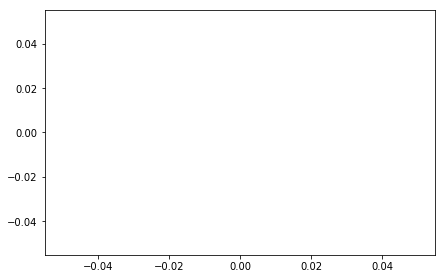

In [32]:
plt.plot(); # creates empty plot, semi colon suppresses text output

##### Simple line plot

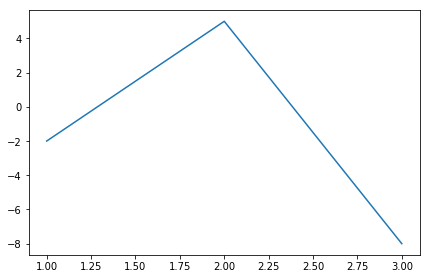

In [33]:
# Simple plot of two lists, note that they are of equal length
# plt.plot(x,y)

plt.plot([1,2,3],[-2,5,-8])
plt.show()  # Note: we don't have to run plt.show() 
            # if we have run  %matplotlib inline  once in the kernel session

##### Plot 50 random numbers

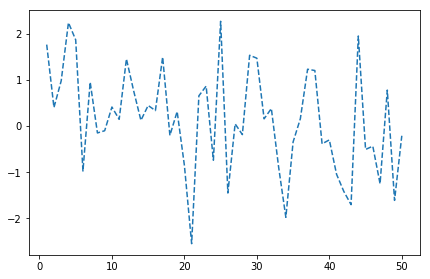

In [34]:
# every new cell where you run plt.plot() will create a new figure

N = 50 
x = np.arange(1,N+1)
y = np.random.randn(N)

plt.plot(x,y,linestyle='--');

##### Two line plots in the same figure

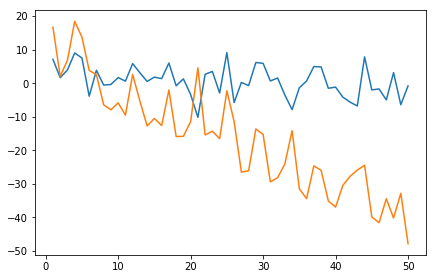

In [35]:
# if plt.plot(*args) are run in the same cell
# we will plot on the same axes

plt.plot(x,4*y)
plt.plot(x,np.abs(10*y)-x); # semi colon to suppress text output

##### New plot in one cell
`plt.figure()` creates a new figure in the same cell

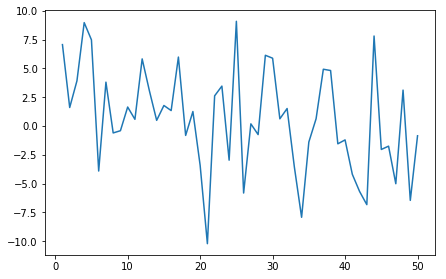

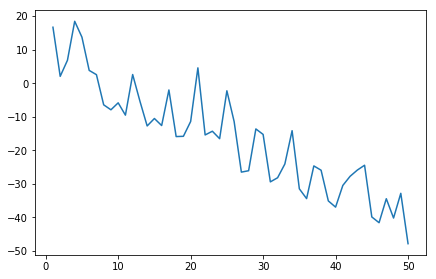

In [36]:
# if plt.plot(*args) are run in the same cell
# we will plot on the same axes

plt.figure()
plt.plot(x,4*y)

plt.figure()
plt.plot(x,np.abs(10*y)-x);

##### Scatter plot

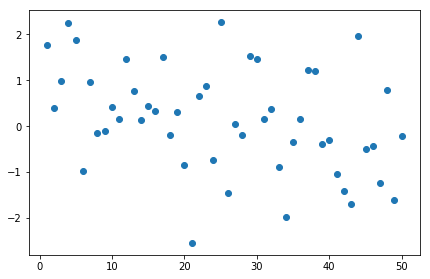

In [37]:
# Relationship between two variables
plt.scatter(x,y);

##### Combine line and scatter plots

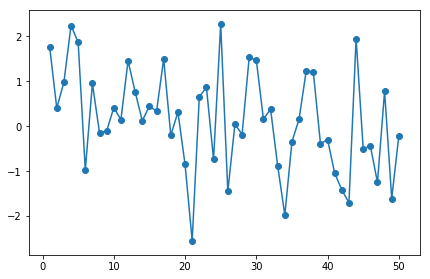

In [38]:
plt.plot(x,y)
plt.scatter(x,y);

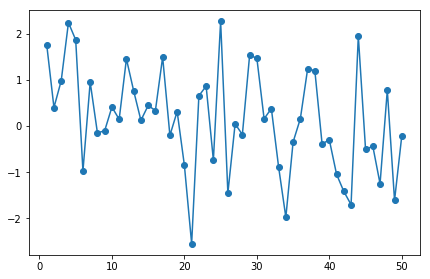

In [39]:
plt.plot(x,y,marker='o');

##### Histograms

In [40]:
N=20
vals = np.random.randint(0,11,N)
print(sorted(vals))

[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 5, 7, 9, 10]


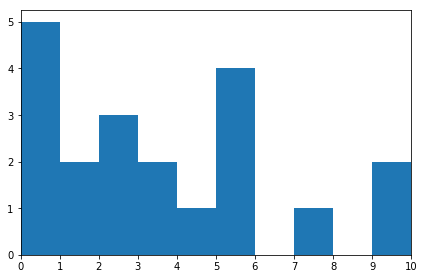

In [41]:
plt.xlim(0,10) # change limits of x axis
plt.xticks(np.arange(11)) # change ticks on x-axis
plt.hist(vals);

##### Histogram with bins

In [42]:
bins = np.linspace(0,10,6)
bins

array([  0.,   2.,   4.,   6.,   8.,  10.])

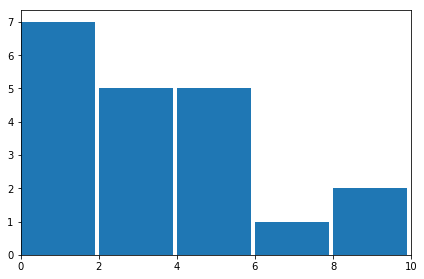

In [43]:
# histogram with bins
#bins = np.linspace(0,10,5)
plt.hist(vals,bins=bins,width=1.9) # change width of bars, so we can see space in between
plt.xlim(0,10)
plt.show()

#### Object-oriented approach (preferred approach)
The object-oriented approach is more powerful and should be used when you want more control of your visualization. Instead of letting matplotlib handle what figure and axes that is the current one, we assign the `figure` and `axes` objects to variables and apply functions via methods on them.
##### Figures and axes objects

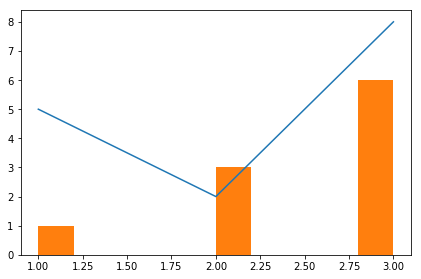

In [44]:
# simple plot

f, ax = plt.subplots() # returns tuple:
# f is the canvas object, can contain several plots i.e. axes objects (p)

ax.plot([1,2,3],[5,2,8]);
ax.hist(np.random.randint(1,4,10));

##### Several subplots on the same Figure

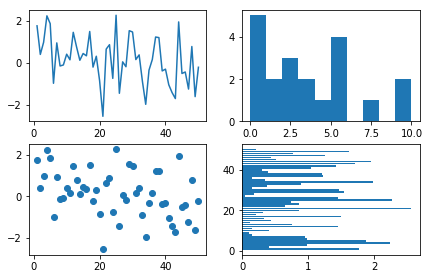

In [45]:
f, ax = plt.subplots(nrows=2,ncols=2)
# or
# f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=2,ncols=2)

ax[0,0].plot(x, y)
ax[1,0].scatter(x, y)
ax[0,1].hist(vals)
ax[1,1].barh(x,np.abs(y));

### 1.3 Plot styling

#### Add labels, text, legend and change color

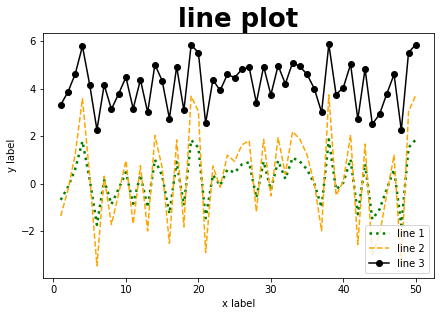

In [46]:
# Three different line plots on same axes

N = 50 
x = np.arange(1,N+1)
y = np.random.randn(N)

fig, ax = plt.subplots()

ax.plot(x,y,color='green', linestyle=':', label='line 1',linewidth = 2.5)
ax.plot(x,y*2,color='orange', linestyle='--', label = 'line 2')
ax.plot(x,y+4,color='black',marker='o', label = 'line 3')

ax.legend(loc=4) # location of legend is an integer, 
# for text to be correct in the legend the plots need a label

#ax.legend(loc=4, labels=['y', 'y*2', 'y+4']) 

# add plot LaTex style title, with line breaks
ax.set_title('line plot',fontweight='bold',fontsize=26) 


ax.set_xlabel('x label') # add xlabel
ax.set_ylabel('y label'); # add ylabel

#### Set limits and annotate values in the plot

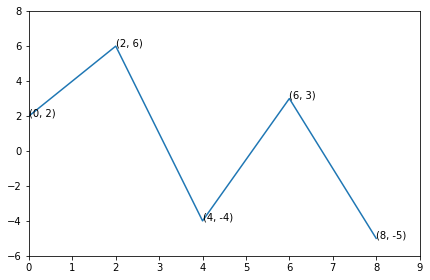

In [47]:
x = np.arange(0,10,2)
y = np.array([2,6,-4,3,-5])

fig, ax = plt.subplots()


ax.set_ylim(-6,8)
ax.set_xlim(0,9)
ax.plot(x,y)

for coord in zip(x, y):
    ax.annotate(s = str(coord),xy = coord) # coord = coordinates


#### Opacity, marker size and color bar

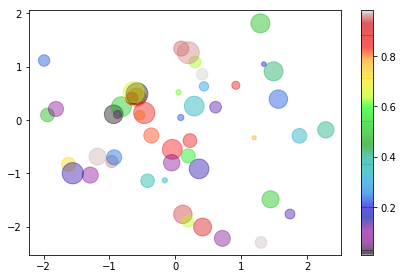

In [48]:
N=50

x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.rand(N)
sizes = N*10 * np.random.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.4, cmap='nipy_spectral')
plt.colorbar(); #this will add a color bar to the right

## 2. Pandas 
- **pandas:** Mostly used for quick plotting of DataFrames and time series

In [49]:
import pandas as pd

# load data
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


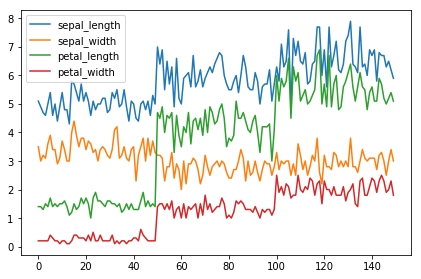

In [50]:
df.plot();

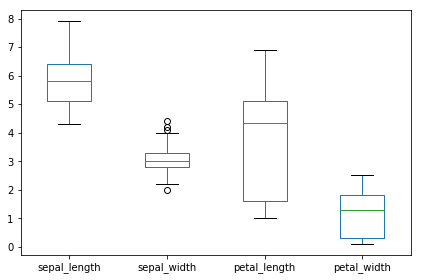

In [51]:
df.plot.box();
#df.boxplot()

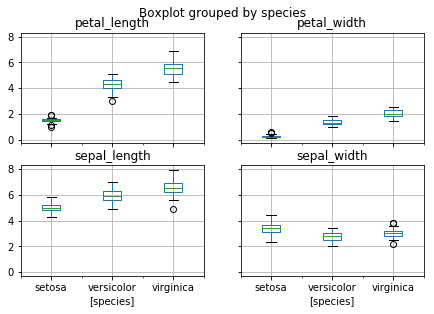

In [52]:
df.boxplot(by='species');

In [53]:
sp = list(df['species'].unique())
cols = list(['g','b','y'])
colors = dict(zip(sp,cols))
colors

{'setosa': 'g', 'versicolor': 'b', 'virginica': 'y'}

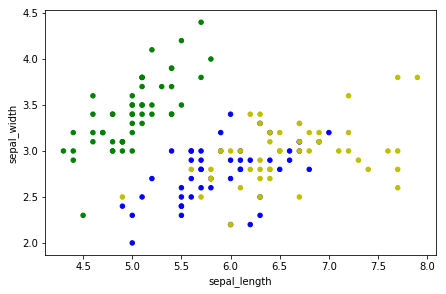

In [54]:
df.plot.scatter('sepal_length','sepal_width',c=df['species'].apply(lambda x: colors[x]));

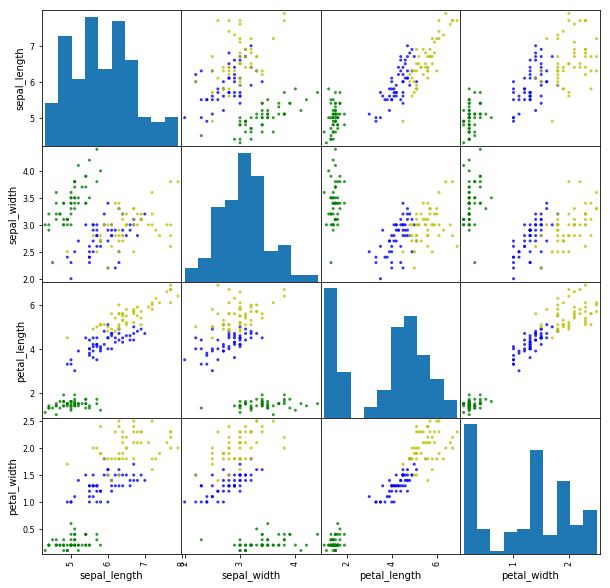

In [55]:
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10, 10), c=df['species'].apply(lambda x: colors[x]));

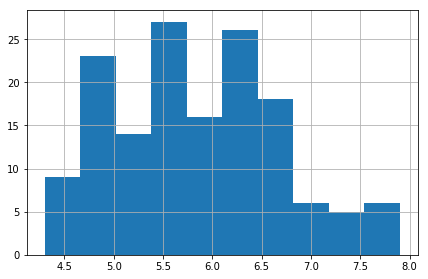

In [56]:
df['sepal_length'].hist();

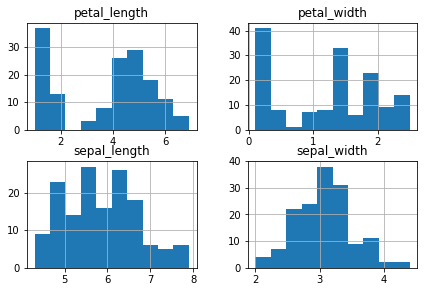

In [57]:
df.hist();

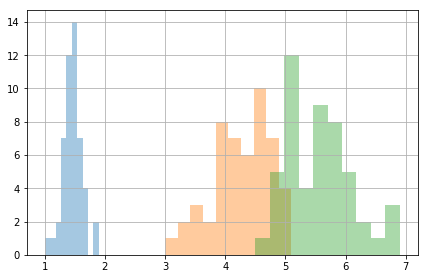

In [58]:
df.groupby("species")['petal_length'].hist(alpha=0.4);

## 3. Quantile-Quantile Plots
### 3.1 proability plot 
- To determine whether or not the data could have been generated from the given theoretical distribution

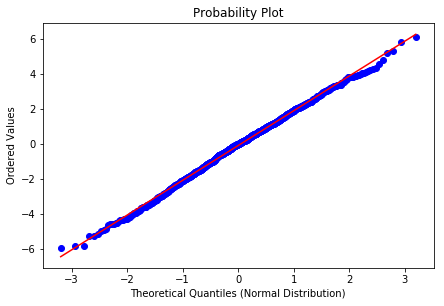

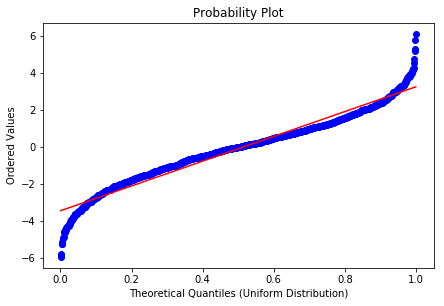

In [59]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
x = np.random.normal(0,2,1000)
stats.probplot(x, dist='norm', plot=plt);
plt.xlabel('Theoretical Quantiles (Normal Distribution)');
plt.figure()
stats.probplot(x, dist='uniform', plot=plt);
plt.xlabel('Theoretical Quantiles (Uniform Distribution)');

## Quantile-Quantile plot
- Visually compare two distributions by graphing the quantiles of one versus the quantiles of the other.
- Either of both of these distributions may be empirical or theoretical.

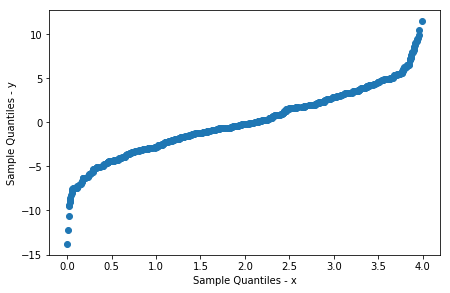

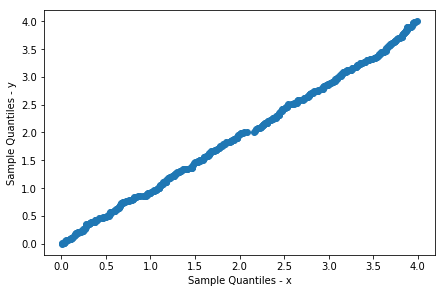

In [60]:
def my_qqplot_2samples(x, y):
    '''
    A simple implementation of Q-Q Plot of two samples’ quantiles.
    
    '''
    if(len(x) != len(y)):
        print("Error! Current implementation only support two samples with the same size")
        return;
    x.sort()
    y.sort()
    plt.plot(x,y,"o")
    plt.xlabel('Sample Quantiles - x')
    plt.ylabel('Sample Quantiles - y')
    
x1 = np.random.uniform(0,4,500)
x2 = np.random.normal(0,4,500)
my_qqplot_2samples(x1, x2);

plt.figure()
x1 = np.random.uniform(0,4,500)
x2 = np.random.uniform(0,4,500)
my_qqplot_2samples(x1, x2);